<a href="https://colab.research.google.com/github/DhmhtrhsPakakis/DhmhtrhsPakakis/blob/main/MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [3]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [18]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [19]:
rows = 5
digits_per_row = 5

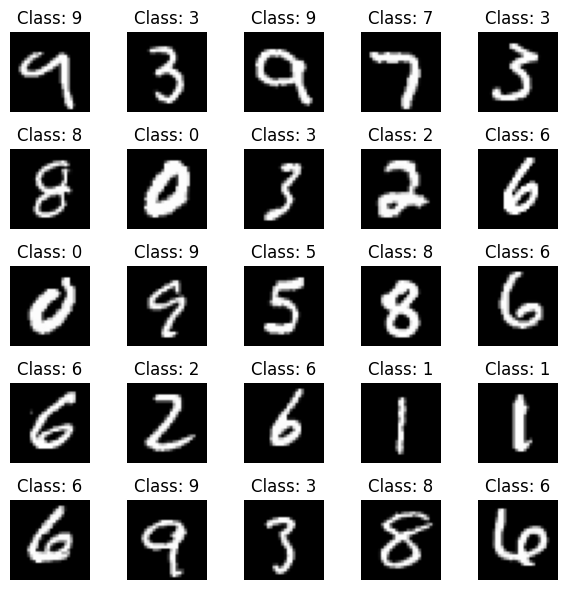

In [20]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [21]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)



print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [22]:
activation = 'relu'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.005
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 30

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-3 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6456 - loss: 1.3685 - val_accuracy: 0.8986 - val_loss: 0.3632
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9016 - loss: 0.3508 - val_accuracy: 0.9191 - val_loss: 0.2800
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9207 - loss: 0.2781 - val_accuracy: 0.9297 - val_loss: 0.2412
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9322 - loss: 0.2394 - val_accuracy: 0.9360 - val_loss: 0.2143
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9399 - loss: 0.2116 - val_accuracy: 0.9425 - val_loss: 0.1933
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9463 - loss: 0.1896 - val_accuracy: 0.9475 - val_loss: 0.1764
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9512 - loss: 0.1717 - val_accuracy: 0.9513 - val_loss: 0.1625
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9559 - loss: 0

# Display Loss and Accuracy per Training Epoch

In [26]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

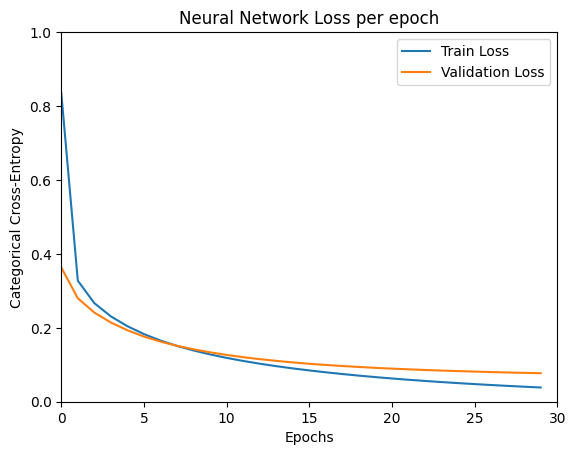

In [27]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

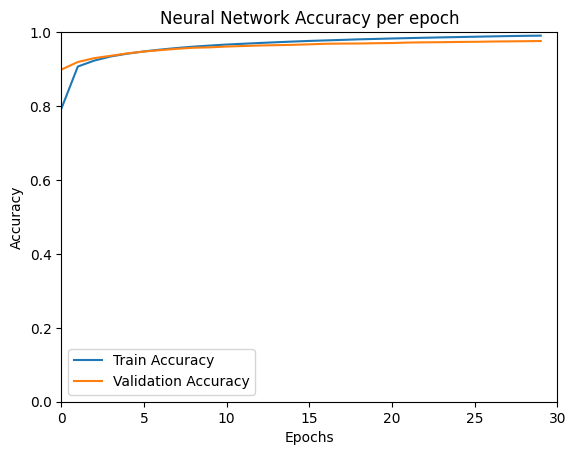

In [28]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


$$
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
\text{Epochs} & \text{Inner Layers} & \text{Neurons} & \text{Learning Rate} & \text{Activation Func.} & \text{Accuracy} & \text{Loss} & \text{Validation Accuracy} & \text{Valid. Loss} \\
\hline
 10&  2&  256&  0.001&  tanh& 0.9349 & 0.2265 & 0.9332 & 0.2234 \\
\hline
 30-με-early-stopping& 2 & 256 &  0.001& tanh & 0.9664 & 0.1194 & 0.9548 &  0.1479\\
\hline
 30 -με- early -stopping(σταματησε- στα- 15)​&  2& 256 & 0.001 & relu &  0.9980&0.0131  & 0.9597 &  0.2223\\
\hline
 30 -με- early -stopping(σταματησε- στα -22)&  3&  256& 0.001 & relu &0.9999  & 0.0025 & 0.9605 &0.2019  \\
\hline
 30 -με -early- stopping(σταματησε- στα- 11)& 2 &  512&  0.001&  relu& 1 & 0.0014 &  0.9606& 0.2300 \\
\hline
 30- με- early -stopping(σταματησε- στα -12)& 3 & 256 &  0.005& relu & 0.9812 & 0.0593 & 0.9592 & 0.1730 \\
\hline
\end{array}
$$
Αρχικα πιστευω οτι τα 10 epochs ηταν λιγα οποτε τα εβαλα 30 αλλα με early stopping ωστε αν δεν βελτιωνεται να σταματησει.Αν και σε πολλα σταματησε νωριτερα παρατηρησα οτι αυξησε την αποδοση του μοντελου αν και σε καποιες περιπτωσεις ο συνδιασμος του epochs με την αλλαγη αλλων παραμετρων δημιουργησε overffiting.Τα inner layers τα αλλαξα σε 3 γιατι πιστυω οτι για τις εικονες ισως χρειαζοταν αθξημενη ικανοτητα μαθησης αλλα και αυτο ειχε κινδυνο ovefiting.Το learning rate το αλλαξα μονο στην τελευταια περιπτωση γιατι παρατηρησα οτι τα 3 inner layers με τα epochs ηταν πολυ καλα αλλα κανανε overfiting.Πλησιαζαν πολυ καλα τις τιμες του training set αλλα το validation θα μπορουσε να βελτιωθει.Ετσι ανεβασα το learning rate και οντως βελτιωθηκε το validation.Επισης αλλαξα την συναρτηση ενεργοποησης γιατι η relu στα βαθια νευρωνικα δικτυα ειναι πιο αποτελεσματικη.
Αρα οι παραμετροι που επιλεγω ειναι η τελευταια στηλη γιατι μαθαινει πιο γενικα και δεν μαθαινει τελεια το training set αλλα χανει στο validation,ειναι καπως ισοζυγισμενο και για αυτο το επελεξα.


## 2. Validation: Show 1 misclassified digit from each class.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


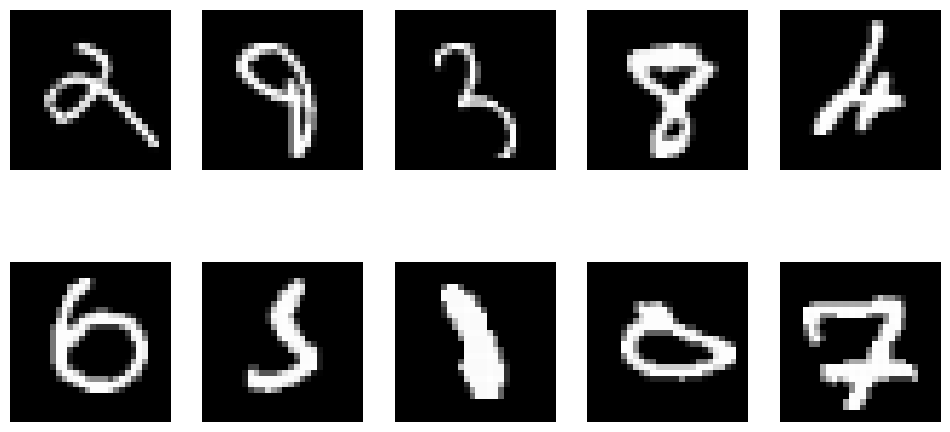

In [92]:
y_test_labels = tf.argmax(y_test,axis=1).numpy()
pred_values = model.predict(x_test)
pred_labels = np.argmax(pred_values, axis=1)
misclassified = np.where(pred_labels != y_test_labels)[0]
results={}
for i in misclassified:
  if y_test_labels[i] not in results:
    results[y_test_labels[i]] = (i,pred_labels[i])
  if len(results) == 10:
    break
plt.figure(figsize=(12,6))
for i,(true_class,(img_idx,pred_class)) in enumerate(results.items()):
  image = x_test[img_idx].reshape((28,28))
  plt.subplot(2,5,int(i)+1)
  plt.imshow(image, cmap='gray')
  plt.axis('off')
plt.tight_layout
plt.show()

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

Ενας τροπος που θα μπορουσαμε να βελτιωσουμε την ακριβεια ειναι η αλλαγη της αρχιτεκτονικης.Τα μοντελα CNNs θα βοηθουσαν σιγουρα στην βελτιωση της ακριβειας.Τα νευρωνικα δυκτια αυτα ειναι πολυ δυνατα στην επεξεργασια και ομαδοποιηση εικονων καθως εφαρμοζουν φιλτρα(kernels) και επισης μειωνουν το μεγεθος της εικονας κρατοντας μονο τις σημαντικες πληροφοριες.

In [10]:
print(f"Min: {np.min(x_train)}, Max: {np.max(x_train)}")

Min: 0, Max: 255


Μια αλλη μέθοδος που θα μπορουσαμε να βελτιωσουμε την επιδοση ειναι να κανονικοποιουσαμε τις τιμες ετσι ωστε τα δεδομενα να βρισκονται σε ελεγχομενο ευρος,αποφευγουμε τον πολλαπλασιασμο με τιμες που θα μεγαλωσουν πολυ τις τιμες των δεδομενων και εχουμε μικροτερο overiftting.Επομενως με τα hyperparameters που επελεξα κανονικοποιησα τα δεδομενα.

Εκπαιδευσα το μοντελο με κανονικοποιημενα δεδομενα και παρατηρησα σε ολα βελτιωση αλλα σημαντικη βελτιωση στο validation.
$$
\begin{array}{|c|c|c|c|c|}
\hline
\text{} & \text{Accuracy} & \text{Loss} & \text{Validation Acc} & \text{Validation Loss}  \\
\hline
 Before-Norm.&  0.9812&  0.0593&  0.9592&  0.1730  \\
\hline
 After-Norm.& 0.9893 & 0.0426 &  0.9759& 0.0771  \\
\hline
\end{array}
$$

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [25]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
